In [1]:
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gc

In [2]:
adata =sc.read('data/processed_immune.h5ad')

In [3]:
scv.pp.filter_genes_dispersion(adata, n_top_genes = 3000, flavor='cell_ranger', log=False)
scv.pp.pca(adata)

Extracted 3000 highly variable genes.


In [4]:
adata.obs['cell_type'] = adata.obs['cell_type'].cat.rename_categories({'Pro-inflammatory aM1 cells': 'aM1 cells',
                                                                      'Anti-inflammatory aM2 cells': 'aM2 cells'})

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
immune_colors =  {'aM2 cells':'#1f77b4', 'B-cells':'#ff7f0e', 'CD1C+ DC':'#2ca02c', 'Common lymphoid progenitor (CLP)':'#d62728', 'Cycling B cells':'#9467bd', 'Cycling lymphoctyes':'#8c564b', 'FLT3+ preDC':'#e377c2', 'IL7R+ T cells':'#7f7f7f', 'Immature DP leukocytes':'#bcbd22', 'Macrophage':'#17becf', 'Monocyte 1':'#aec7e8', 'Monocyte 2':'#ffbb78', 'Monocyte/Neutrophil precursor cells':'#98df8a', 'Plasma cell':'#ff9896', 'aM1 cells':'#c5b0d5', 'Proliferating macrophage/monocyte cells':'#c49c94', 'aM-like cells':'#f7b6d2', 'pDC':'#c7c7c7'} 

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/pylab/backend_inline.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display
/usr/lib/python3/dist-packages/ipykernel/pylab/backend_inline.py:164: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inline_support()`
  configure_inline_support(ip, backend)


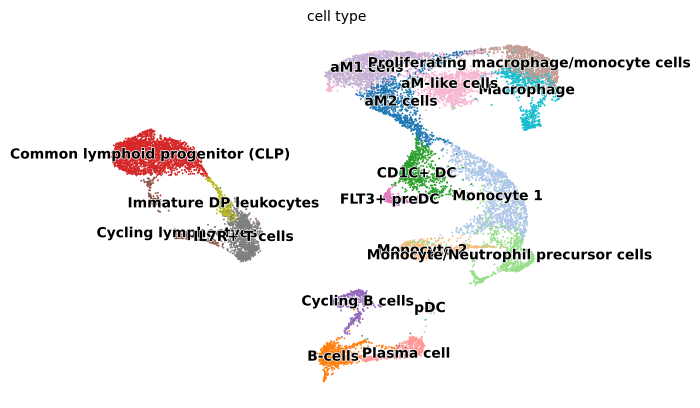

In [6]:
scv.pl.umap(adata, color='cell_type', palette = immune_colors)

In [7]:
degs = pd.read_excel('../Wong_Fetal_Lung_Dataset_August_2023.xlsx', 
                     sheet_name='Immune')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
cells = ['Monocyte/Neutrophil precursor cells', 'Monocyte 1', 'Monocyte 2', 
         'aM-like cells', 'aM1 cells',
        'aM2 cells', 'Macrophage', 'Proliferating macrophage/monocyte cells']
selected = adata[adata.obs.cell_type.isin(cells)]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
import rpy2.rinterface_lib.callbacks
import logging
import rpy2.robjects as ro

from rpy2.robjects import pandas2ri
import anndata2ri
from rpy2.robjects.conversion import localconverter

pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/spencer/.local/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:263: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '
/home/spencer/.local/lib/python3.8/site-packages/rpy2/robjects/numpy2ri.py:205: DeprecationWarning: The global conversion available with activate() is deprecated and will be removed in the next major release. Use a local converter.
  warnings.warn('The global conversion available with activate() '


In [10]:
%%R

library(anndata)
library(slingshot)
library(Matrix)
library(tradeSeq)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



    consider that it could be called from a Python process. This
    results in a quasi-obligatory segfault when rpy2 is evaluating
    R code using it. On the hand, rpy2 is accounting for the
    fact that it might already be running embedded in a Python
    process. This is why:
    - Python -> rpy2 -> R -> reticulate: crashes
    - R -> reticulate -> Python -> rpy2: works

    The issue with reticulate is tracked here:
    https://github.com/rstudio/reticulate/issues/208
    

R[write to console]: Loading required package: princurve

R[write to console]: Loading required package: TrajectoryUtils

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: MatrixGenerics

R[write to console]: Loading required package: matrixStats

R[write to console]: 
Attaching package: ‘MatrixGenerics’


R[write to console]: The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars

In [11]:
scv.pp.filter_genes_dispersion(selected, n_top_genes = 1000, flavor='cell_ranger', log=False)#, subset=False)
scv.pp.pca(selected)

Extracted 1000 highly variable genes.


In [12]:
dimred = selected.obsm['X_pca'][:,:30]
clustering = selected.obs['cell_type']
counts = pd.DataFrame(selected.layers['spliced'].todense().T, index=selected.var.index.values, 
                  columns = selected.obs.index.values, dtype=float)
batch = selected.obs['batch']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%R -i dimred -i clustering -i counts -i batch

counts = as.matrix(counts)

set.seed(1)

sds <- slingshot(data = dimred, clusterLabels = clustering, start.clus='Monocyte/Neutrophil precursor cells',
                  end.clus=c('Monocyte 2', 'Proliferating macrophage/monocyte cells',
                            'aM1 cells'),
                 approx_points = 300, thresh = 0.01, stretch = 0.8, allow.breaks = TRUE, shrink = 0.99)

sds <- as.SlingshotDataSet(sds)

pseudotime <- slingPseudotime(sds)#, na = FALSE)
cellWeights <- slingCurveWeights(sds)

write.csv(pseudotime, 'data/am_pseudotimes.csv')

pseudotime <- slingPseudotime(sds, na = FALSE)
cellWeights <- slingCurveWeights(sds)

batch = factor(batch)
U <- model.matrix(~batch)

sce <- fitGAM(counts = counts, U=U, pseudotime = pseudotime, cellWeights = cellWeights,
                 nknots = 6, verbose = TRUE)

table(rowData(sce)$tradeSeq$converged)

assoRes <- associationTest(sce, lineages=TRUE)
write.csv(assoRes, 'data/am_genes.csv')
head(assoRes)

rowData(sce)$assocRes <- assoRes
assocRes <- rowData(sce)$assocRes

Genes1 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_1, "fdr") <= 0.01)
]

Genes2 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_2, "fdr") <= 0.01)
]

Genes3 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_3, "fdr") <= 0.01)
]

Genes4 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_4, "fdr") <= 0.01)
]

write.csv(Genes1, 'data/1Genes_am.csv')
write.csv(Genes2, 'data/2Genes_am.csv')
write.csv(Genes1, 'data/3Genes_am.csv')
write.csv(Genes2, 'data/4Genes_am.csv')

In [13]:
import pandas as pd
pst = pd.read_csv('data/am_pseudotimes.csv', index_col=0)
pst

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lineage1,Lineage2,Lineage3,Lineage4
Cell-1,25.234133,NaN,NaN,NaN
Cell-2,30.323149,17.443689,NaN,NaN
Cell-3,24.137435,NaN,NaN,NaN
Cell-4,1.573810,1.566579,1.483511,1.507663
Cell-5,24.011295,NaN,NaN,NaN
...,...,...,...,...
Cell-8845,24.011295,NaN,NaN,NaN
Cell-8846,17.996567,19.326011,NaN,NaN
Cell-8847,NaN,21.069416,NaN,NaN
Cell-8848,31.382751,NaN,NaN,NaN


In [14]:
selected.obs['pseudotime1'] = pst.Lineage1.values
selected.obs['pseudotime2'] = pst.Lineage2.values
selected.obs['pseudotime3'] = pst.Lineage3.values
selected.obs['pseudotime4'] = pst.Lineage4.values

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


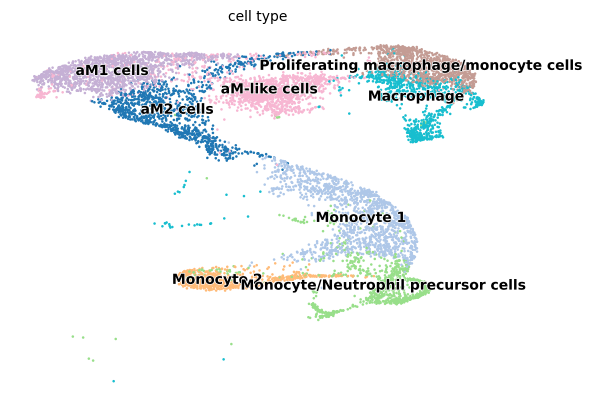

In [15]:
scv.pl.umap(selected, color='cell_type')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/Proliferating_macro_mono_trajectory.pdf


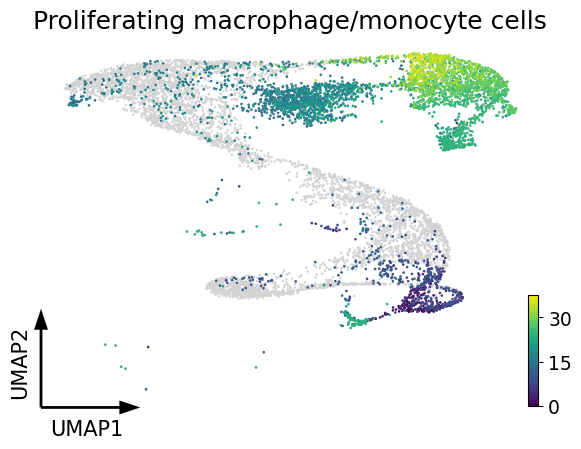

saving figure to file figures/aM1_trajectory.pdf


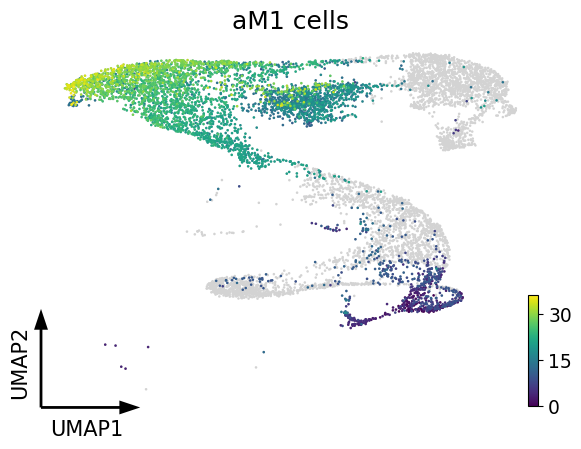

saving figure to file figures/Monocyte1_trajectory.pdf


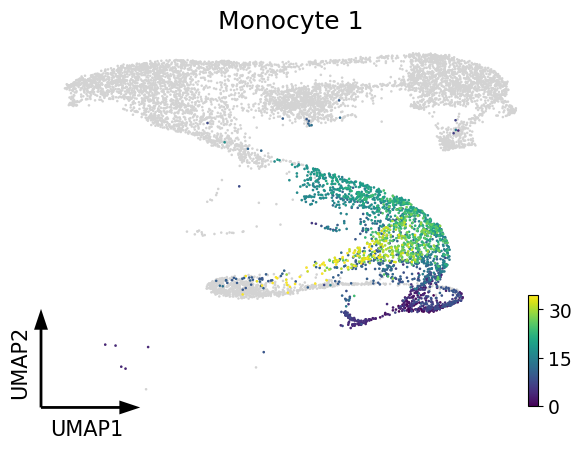

saving figure to file figures/Monocyte2_trajectory.pdf


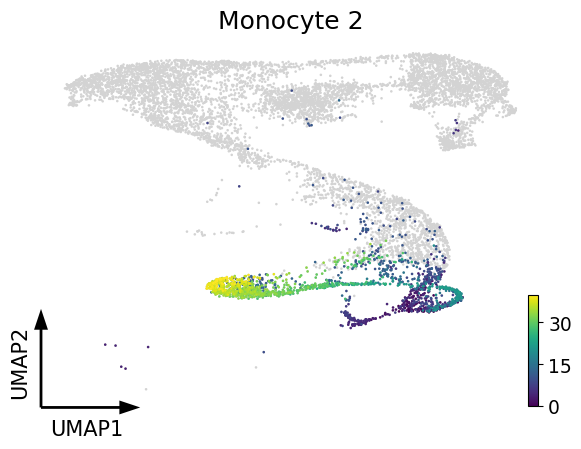

In [16]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
scv.pl.umap(selected, color='#D3D3D3',ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime1',ax=ax, show=True, title='Proliferating macrophage/monocyte cells',fontsize=18,
           save='figures/Proliferating_macro_mono_trajectory.pdf', frameon='artist')

fig,ax=plt.subplots()
scv.pl.umap(selected, color='#D3D3D3',ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime2',ax=ax, show=True, title='aM1 cells',fontsize=18,
           save='figures/aM1_trajectory.pdf', frameon='artist')

fig,ax=plt.subplots()
scv.pl.umap(selected, color='#D3D3D3',ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime3',ax=ax, show=True, title='Monocyte 1',fontsize=18,
           save='figures/Monocyte1_trajectory.pdf', frameon='artist')

fig,ax=plt.subplots()
scv.pl.umap(selected, color='#D3D3D3',ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime4',ax=ax, show=True, title='Monocyte 2',fontsize=18,
           save='figures/Monocyte2_trajectory.pdf', frameon='artist')

In [18]:
selected.obs['UMAP1'] = selected.obsm['X_umap'][:,0]
selected.obs['UMAP2'] = selected.obsm['X_umap'][:,1]
selected.obs[['pseudotime1', 'pseudotime2', 'pseudotime3','pseudotime4',
              'cell_type', 'UMAP1', 'UMAP2']].to_csv('data/Immune_slingshot1.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
macro_genes = pd.read_csv('data/1Genes_am.csv')['x'].values
am1_genes = pd.read_csv('data/2Genes_am.csv')['x'].values
mono1_genes = pd.read_csv('data/3Genes_am.csv')['x'].values
mono2_genes = pd.read_csv('data/4Genes_am.csv')['x'].values

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
macro_genes = macro_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in macro_genes]]
am1_genes = am1_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in am1_genes]]
mono1_genes = mono1_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in mono1_genes]]
mono2_genes = mono2_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in mono2_genes]]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
gc.collect()
selected.layers['spliced'] = selected.X.copy()
selected.layers['unspliced'] = selected.X.copy()
gc.collect()
scv.pp.neighbors(selected, n_pcs=30, n_neighbors=30)
gc.collect()
scv.pp.moments(selected, n_pcs=None, n_neighbors=None)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


computing neighbors
    finished (0:00:05) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [35]:
selected_macro_genes  = []
for x in selected.var_names:
    if x in macro_genes:
        selected_macro_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime1.isnull()][np.argsort(selected[~selected.obs.pseudotime1.isnull()].obs['pseudotime1']),list(selected_macro_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime1.isnull()].obs['pseudotime1'],
            columns=list(selected_macro_genes)).round(decimals=3).to_csv('data/Immune_Prolif_macro_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


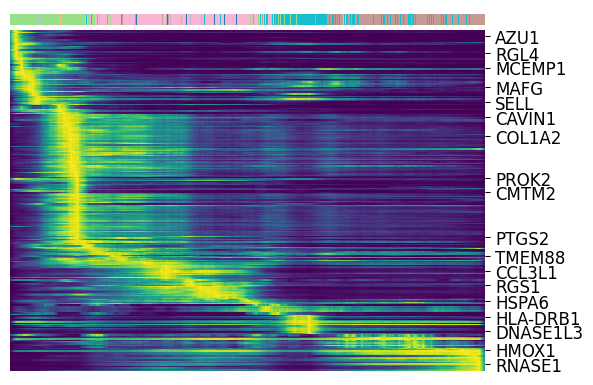

In [24]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime1.isnull()], sortby='pseudotime1', var_names=list(macro_genes),
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True,
                 rasterized=True, figsize=(6,4))
yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in (degs[ ['Monocyte/Neutrophil precursor cells', 'Monocyte 1', 'Monocyte 2', 
         'aM-like cells', 'aM1 cells',
        'aM2 cells', 'Macrophage', 'Proliferating macrophages/monocytes']].values.flatten()):
        if len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 10:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=12)
plt.savefig('figures/Proliferatingmacro_trajectory_heatmap.pdf')
plt.show()

In [36]:
selected_am1_genes  = []
for x in selected.var_names:
    if x in am1_genes:
        selected_am1_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime2.isnull()][np.argsort(selected[~selected.obs.pseudotime2.isnull()].obs['pseudotime1']),list(selected_am1_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime2.isnull()].obs['pseudotime2'],
            columns=list(selected_am1_genes)).round(decimals=3).to_csv('data/Immune_aM1_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


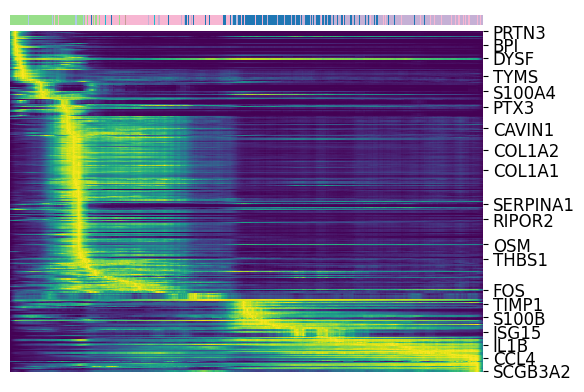

In [22]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime2.isnull()], sortby='pseudotime2', var_names=list(am1_genes), 
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True,
                 rasterized=True, figsize=(6,4))
yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in (degs[ ['Monocyte/Neutrophil precursor cells', 'Monocyte 1', 'Monocyte 2', 
         'aM-like cells', 'aM1 cells',
        'aM2 cells', 'Macrophage', 'Proliferating macrophages/monocytes']].values.flatten()):
        if len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 10:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=12)
plt.savefig('figures/am1_trajectory_heatmap.pdf')
plt.show()

In [38]:
selected_monocyte1_genes  = []
for x in selected.var_names:
    if x in mono1_genes:
        selected_monocyte1_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime3.isnull()][np.argsort(selected[~selected.obs.pseudotime3.isnull()].obs['pseudotime3']),list(selected_monocyte1_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime3.isnull()].obs['pseudotime3'],
            columns=list(selected_monocyte1_genes)).round(decimals=3).to_csv('data/Immune_Monocyte1_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


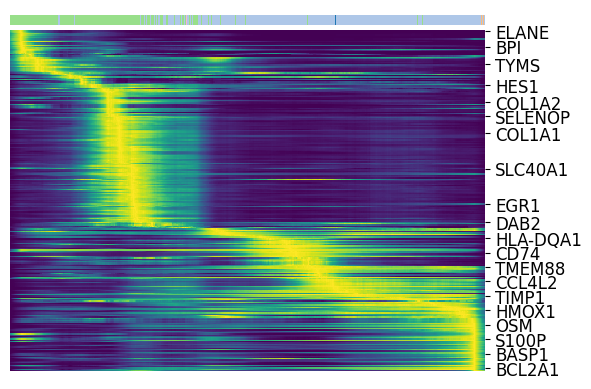

In [23]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime3.isnull()], sortby='pseudotime3', var_names=list(mono1_genes), 
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True,
                  rasterized=True, figsize=(6,4))

yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in (degs[ ['Monocyte/Neutrophil precursor cells', 'Monocyte 1', 'Monocyte 2', 
         'aM-like cells', 'aM1 cells',
        'aM2 cells', 'Macrophage', 'Proliferating macrophages/monocytes']].values.flatten()):
        if len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 10:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=12)
plt.savefig('figures/Monocyte1_trajectory_heatmap.pdf')
plt.show()

In [39]:
selected_mono2_genes  = []
for x in selected.var_names:
    if x in mono2_genes:
        selected_mono2_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime4.isnull()][np.argsort(selected[~selected.obs.pseudotime4.isnull()].obs['pseudotime4']),list(selected_mono2_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime4.isnull()].obs['pseudotime4'],
            columns=list(selected_mono2_genes)).round(decimals=3).to_csv('data/Immune_Monocyte2_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


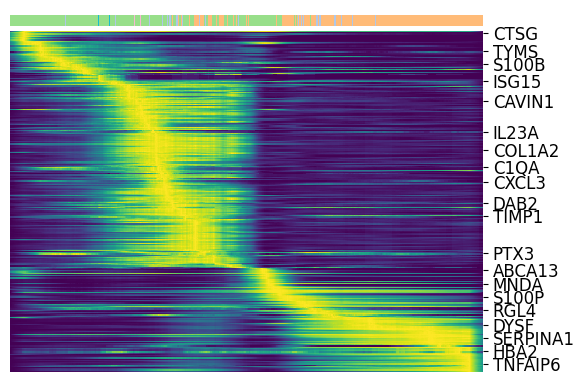

In [24]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime4.isnull()], sortby='pseudotime4', var_names=list(mono2_genes), #
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True,
                  rasterized=True, figsize=(6,4))

yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in (degs[ ['Monocyte/Neutrophil precursor cells', 'Monocyte 1', 'Monocyte 2', 
         'aM-like cells', 'aM1 cells',
        'aM2 cells', 'Macrophage', 'Proliferating macrophages/monocytes']].values.flatten()):
        if len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 10:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=12)
plt.savefig('figures/Monocyte2_trajectory_heatmap.pdf')
plt.show()

In [40]:
cells = ['B-cells', 'Cycling B cells', 'Plasma cell']
selected = adata[adata.obs.cell_type.isin(cells)]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
scv.pp.filter_genes_dispersion(selected, n_top_genes = 1000, flavor='cell_ranger', log=False)#, subset=False)
scv.pp.pca(selected)

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Extracted 1000 highly variable genes.


In [42]:
dimred = selected.obsm['X_pca'][:,:30]
clustering = selected.obs['cell_type']
counts = pd.DataFrame(selected.layers['spliced'].todense().T, index=selected.var.index.values, 
                  columns = selected.obs.index.values, dtype=float)
batch = selected.obs['batch']

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%R -i dimred -i clustering -i counts -i batch

counts = as.matrix(counts)

set.seed(1)

sds <- slingshot(data = dimred, clusterLabels = clustering, start.clus='B-cells',
                  end.clus=c('Plasma cell', 'Cycling B cells'),
                 approx_points = 300, thresh = 0.01, stretch = 0.8, allow.breaks = TRUE, shrink = 0.99)

sds <- as.SlingshotDataSet(sds)

pseudotime <- slingPseudotime(sds)#, na = FALSE)
cellWeights <- slingCurveWeights(sds)

write.csv(pseudotime, 'data/plasma_pseudotimes.csv')

pseudotime <- slingPseudotime(sds, na = FALSE)
cellWeights <- slingCurveWeights(sds)

batch = factor(batch)
U <- model.matrix(~batch)

sce <- fitGAM(counts = counts, U=U, pseudotime = pseudotime, cellWeights = cellWeights,
                 nknots = 6, verbose = TRUE)

table(rowData(sce)$tradeSeq$converged)

assoRes <- associationTest(sce, lineages=TRUE)
write.csv(assoRes, 'data/plasma_genes.csv')
head(assoRes)

rowData(sce)$assocRes <- assoRes
assocRes <- rowData(sce)$assocRes

Genes1 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_1, "fdr") <= 0.01)
]

Genes2 <-  rownames(assocRes)[
  which(p.adjust(assocRes$pvalue_2, "fdr") <= 0.01)
]

write.csv(Genes1, 'data/1Genes_plasma.csv')
write.csv(Genes2, 'data/2Genes_plasma.csv')

In [43]:
import pandas as pd
pst = pd.read_csv('data/plasma_pseudotimes.csv', index_col=0)
pst

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Lineage1,Lineage2
Cell-1,4.426637,NaN
Cell-2,14.235672,19.845213
Cell-3,19.626945,15.686302
Cell-4,22.879605,NaN
Cell-5,21.024638,NaN
...,...,...
Cell-1889,19.886075,NaN
Cell-1890,21.195180,NaN
Cell-1891,22.262970,NaN
Cell-1892,16.310378,12.617940


In [44]:
selected.obs['pseudotime1'] = pst.Lineage1.values
selected.obs['pseudotime2'] = pst.Lineage2.values

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


saving figure to file figures/BcellPlasma_trajectory.pdf


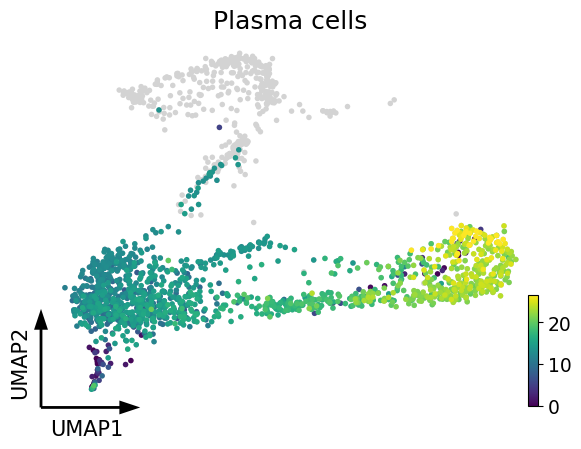

In [45]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()

scv.pl.umap(selected, color='#D3D3D3', ax=ax, show=False)
scv.pl.umap(selected, color='pseudotime1',ax=ax, show=True, title='Plasma cells', frameon='artist',
            fontsize=18,
           save='figures/BcellPlasma_trajectory.pdf')

In [47]:
selected.obs['UMAP1'] = selected.obsm['X_umap'][:,0]
selected.obs['UMAP2'] = selected.obsm['X_umap'][:,1]
selected.obs[['pseudotime1', 'pseudotime2', 
              'cell_type', 'UMAP1', 'UMAP2']].to_csv('data/Immune_slingshot2.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
plasma_genes = pd.read_csv('data/1Genes_plasma.csv')['x'].values
cyclingB_genes = pd.read_csv('data/2Genes_plasma.csv')['x'].values

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
plasma_genes = plasma_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in plasma_genes]]
cyclingB_genes = cyclingB_genes[[ bool(not x.startswith(("RPS", "RPL"))) for x in cyclingB_genes]]

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
gc.collect()
selected.layers['spliced'] = selected.X.copy()
selected.layers['unspliced'] = selected.X.copy()
gc.collect()
scv.pp.neighbors(selected, n_pcs=30, n_neighbors=30)
gc.collect()
scv.pp.moments(selected, n_pcs=None, n_neighbors=None)

computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [51]:
selected_plasma_genes  = []
for x in selected.var_names:
    if x in plasma_genes:
        selected_plasma_genes.append(x)

pd.DataFrame(selected[~selected.obs.pseudotime1.isnull()][np.argsort(selected[~selected.obs.pseudotime1.isnull()].obs['pseudotime1']),list(selected_plasma_genes)].layers['Ms'],
             index=selected[~selected.obs.pseudotime1.isnull()].obs['pseudotime1'],
            columns=list(selected_plasma_genes)).round(decimals=3).to_csv('data/Immune_BcellPlasma_trajectory_heatmap.csv')

/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/lib/python3/dist-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


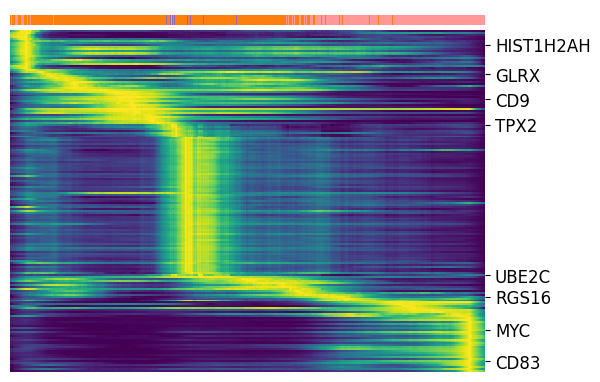

In [34]:
gc.collect()

g= scv.pl.heatmap(selected[~selected.obs.pseudotime1.isnull()], sortby='pseudotime1', var_names=list(plasma_genes), 
              n_convolve=100, col_color='cell_type', yticklabels=True, show=False, sort=True,
                  rasterized=True, figsize=(6,4))
#asdasdasd

yticklabels = []
yticks = []
for x in g.ax_heatmap.get_yticklabels():
    if x.get_text() in (degs[ ['B cells', 'Cycling B cell', 'Plasma cell']].values.flatten()):
        if len(yticks) ==0 or (np.abs(np.array(yticks) - x.get_position()[1])).min() > 10:
            yticklabels.append(x.get_text())
            yticks.append(x.get_position()[1])


g.ax_heatmap.set(yticks=yticks, yticklabels=yticklabels)
g.ax_heatmap.tick_params(labelsize=12)
plt.savefig('figures/BcellPlasma_trajectory_heatmap.pdf')
plt.show()